In [ ]:
# Upload CSV in Colab
from google.colab import files
uploaded = files.upload()


Saving online_gaming_behavior_dataset.csv to online_gaming_behavior_dataset.csv


- Loading the dataset.
- Displaying the first 5 rows to get a quick preview.


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("online_gaming_behavior_dataset.csv")

# Preview the first few rows
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


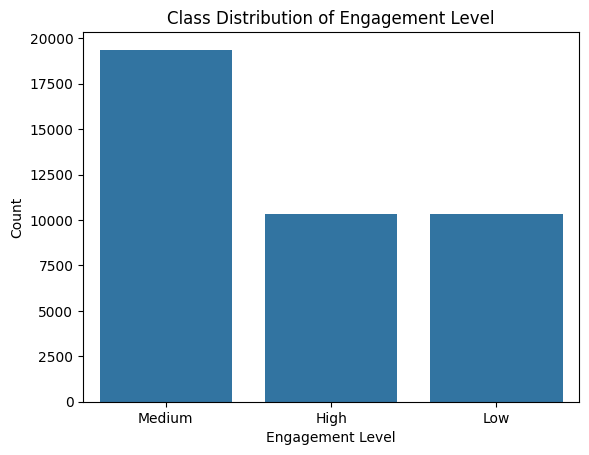

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


In [ ]:
# Check class distribution for EngagementLevel
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='EngagementLevel', data=df)
plt.title('Class Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

# Print raw counts
print(df['EngagementLevel'].value_counts())


- Defines a list of categorical columns in the dataset.

In [ ]:
# Check unique values in original categorical columns
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Gender: ['Male' 'Female']
Location: ['Other' 'USA' 'Europe' 'Asia']
GameGenre: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']
GameDifficulty: ['Medium' 'Easy' 'Hard']
EngagementLevel: ['Medium' 'High' 'Low']


- Encoding categorical variables

In [ ]:
# One-Hot Encode categorical features (except target)
df = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre', 'GameDifficulty'])

# Encode target column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

target_column = 'EngagementLevel'
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

# Visualize encoded categorical features and target
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

encoded_cols = [col for col in df.columns if col.startswith(('Gender_', 'Location_', 'GameGenre_', 'GameDifficulty_'))]

# Plot a few of the one-hot encoded columns
for i, col in enumerate(encoded_cols[:4], 1):  # just a few for space
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col])
    plt.title(f'Encoded: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Plot encoded target
plt.subplot(2, 3, 5)
sns.countplot(x=df[target_column])
plt.title(f'Encoded: {target_column}')
plt.xlabel(f'{target_column} (Encoded)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

- Dropping player ID and Engagement level

In [ ]:
# Drop PlayerID
df.drop('PlayerID', axis=1, inplace=True)

# Split features and target
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']


- Splitting: 20% for testing and 80% for training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


- Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({2: 15499, 0: 8269, 1: 8259})
After SMOTE: Counter({1: 15499, 2: 15499, 0: 15499})


- Correlation heatmape

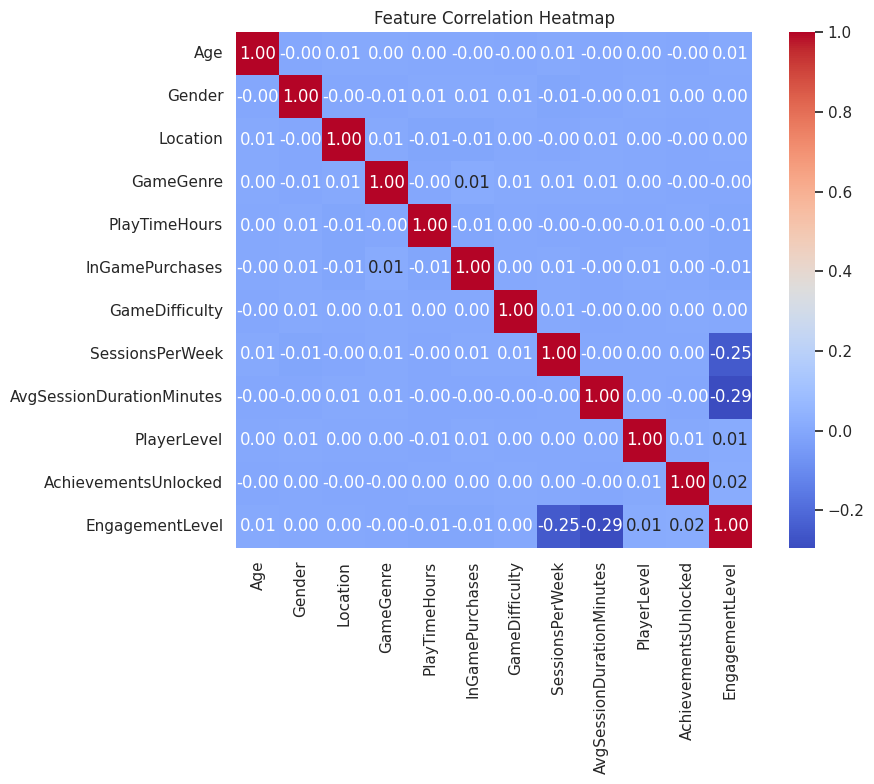

In [ ]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


- Train XGBoost model

In [ ]:
# XGBoost baseline model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:01:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9074559760209816

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2067
           1       0.90      0.90      0.90      2065
           2       0.92      0.93      0.92      3875

    accuracy                           0.91      8007
   macro avg       0.90      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007


Confusion Matrix:
 [[1829   73  165]
 [  63 1850  152]
 [ 152  136 3587]]


- Plot feature importance

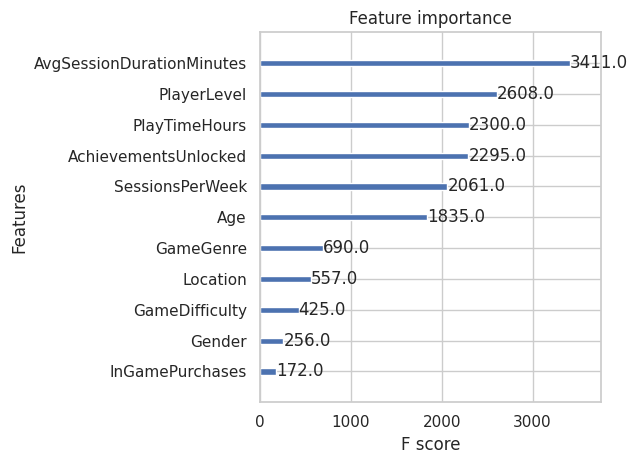

In [ ]:
# Feature importance plot
from xgboost import plot_importance

plot_importance(model)
plt.tight_layout()
plt.show()


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_


- Evaluation of best model

In [ ]:
# Evaluation of best model
y_pred_best = best_model.predict(X_test)

print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Parameters:", random_search.best_params_)

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Accuracy: 0.9176970151117771

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2067
           1       0.92      0.89      0.91      2065
           2       0.92      0.95      0.93      3875

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007


Confusion Matrix:
 [[1822   72  173]
 [  59 1844  162]
 [  99   94 3682]]


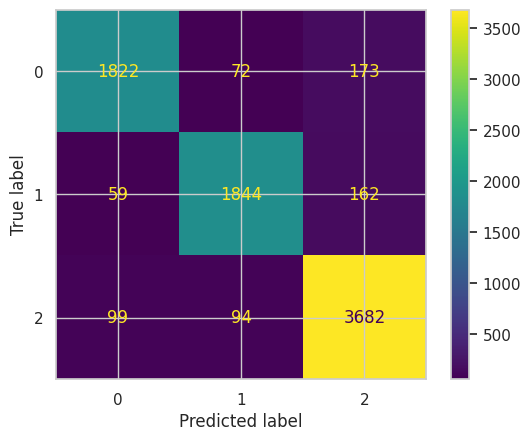

In [ ]:
# Visual Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


In [ ]:
# Additional (optional) evaluation for original model
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

print("\nClassification Report on Training Data:\n", classification_report(y_train, train_preds))
print("\nClassification Report on Test Data:\n", classification_report(y_test, test_preds))

print("\nConfusion Matrix on Test Data:\n", confusion_matrix(y_test, test_preds))


Training Accuracy: 0.9440159865113811
Testing Accuracy: 0.9074559760209816

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8269
           1       0.95      0.92      0.93      8259
           2       0.94      0.97      0.95     15499

    accuracy                           0.94     32027
   macro avg       0.94      0.94      0.94     32027
weighted avg       0.94      0.94      0.94     32027


Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2067
           1       0.90      0.90      0.90      2065
           2       0.92      0.93      0.92      3875

    accuracy                           0.91      8007
   macro avg       0.90      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007


Confusion Matrix on Test Data:
 [[1829   73  165]
 [  63 1850  152]
 [ 152  136 35